# How to do curve fitting
This notebook is a continuation of the previous curve-fitting notebook. 
It shows how 
- you can fit some data points into a model.
- plot the bands of uncertainty

As an example, I use the model
$$m(x)=b + a e^{k x}$$
which is defined in the target function ```exponential```

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'

## Fitting Model

In [10]:
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

## Test data

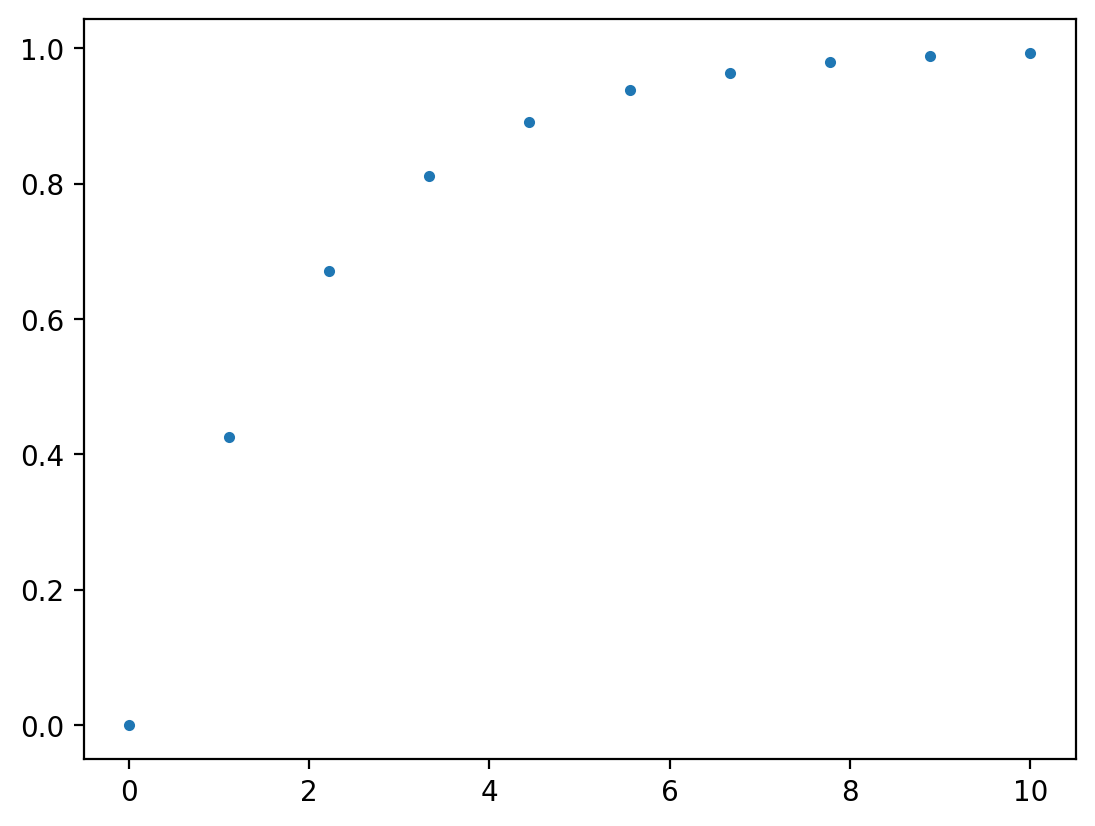

In [11]:
x = np.linspace(0,10,10)

a = -1
b = 1
k = -0.5

y = exponential(x,a,k,b)
plt.plot(x,y,'.');

## Do the fitting
### Clean data
The ```curve_fit``` function sometimes has problems in finding a good fit. Providing an initial guess ```p0``` helps the fitting to converge in these cases.

In [12]:
popt_exponential, pcov_exponential = curve_fit(exponential, x, y, p0=[-1.1,-0.6,1.05])
print('fitted parameters',popt_exponential)

fitted parameters [-1.  -0.5  1. ]


Now lets plot the curve using the fitted parameters.

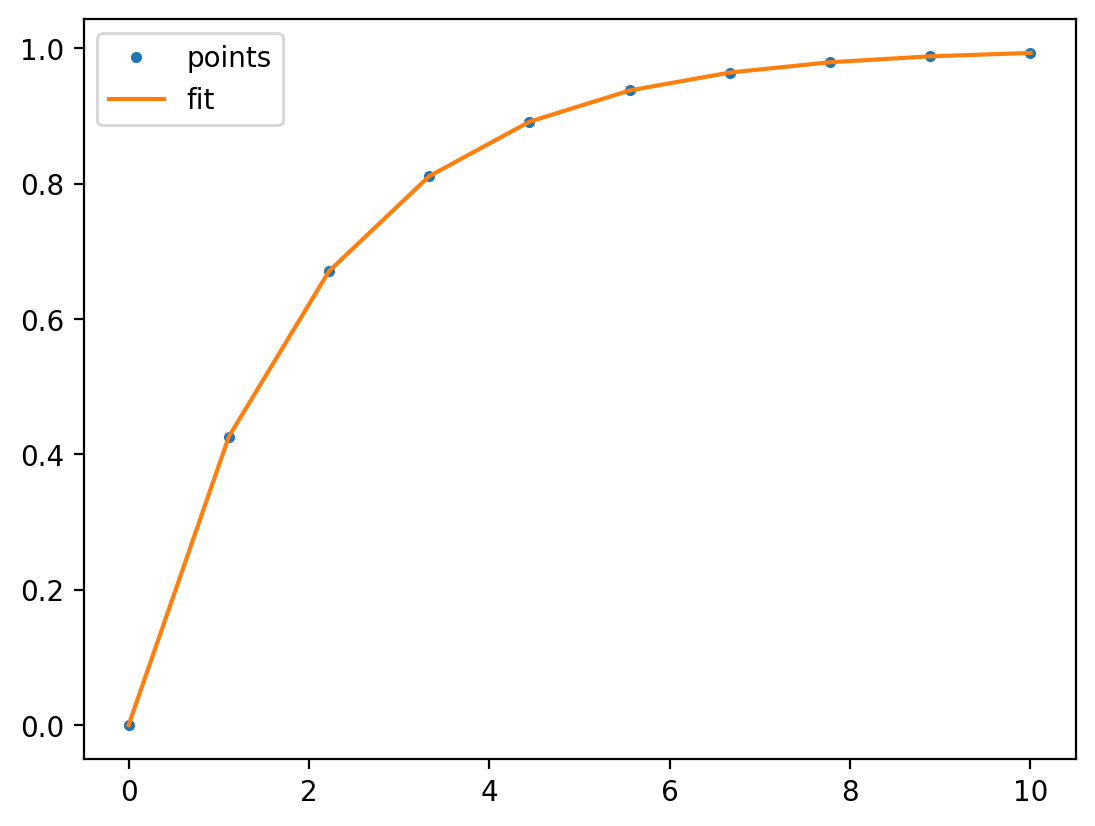

In [13]:
plt.plot(x,y,'.',label='points')
plt.plot(x,exponential(x,popt_exponential[0],popt_exponential[1],popt_exponential[2]),label='fit')
plt.legend();

### Noisy data
Data is mostly noisy. Here, is an example when the fit is made on the data with added Gaussian noise $\mathcal{N}(0,0.05)$.

In [54]:
ny = y+ 0.05*np.random.randn(len(y))
popt_exponential, pcov_exponential = curve_fit(exponential, x, ny, p0=[-1.1,-1,1.05])
print('fitted parameters',popt_exponential)

fitted parameters [-0.95499284 -0.64203146  0.95069703]


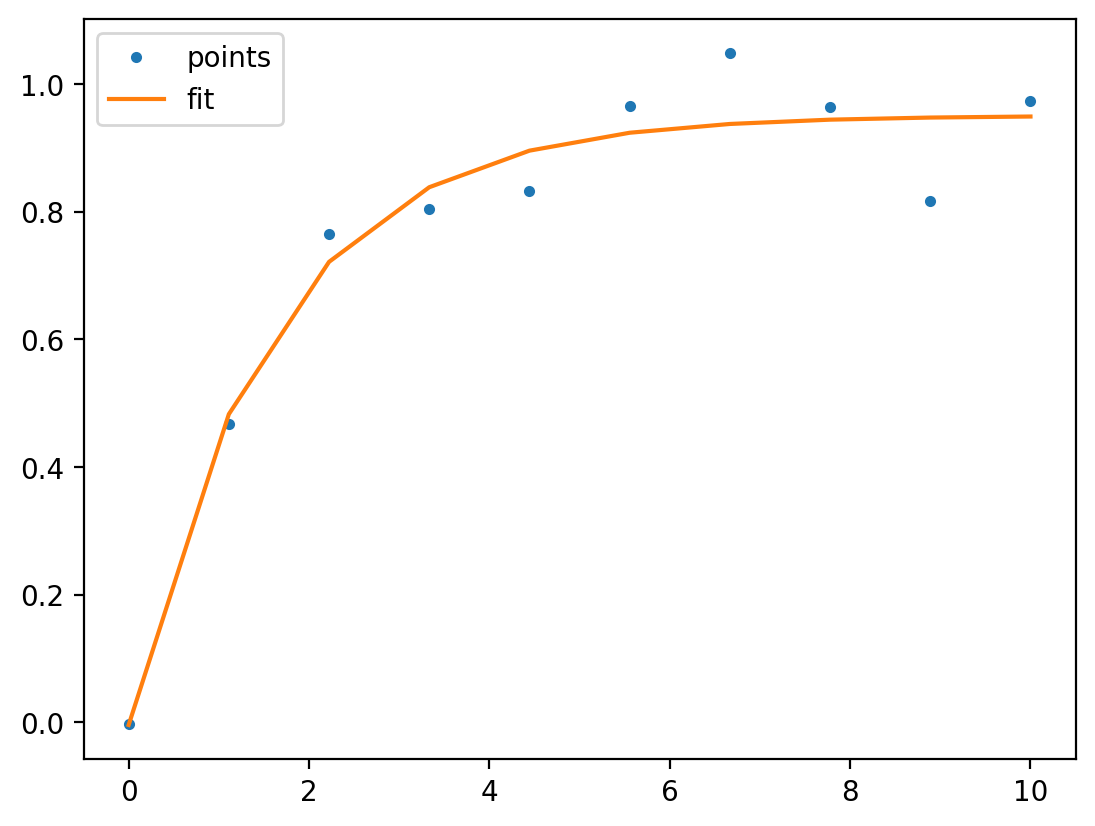

In [55]:
plt.plot(x,ny,'.',label='points')
plt.plot(x,exponential(x,popt_exponential[0],popt_exponential[1],popt_exponential[2]),label='fit')
plt.legend();

### Looking at the uncertainty
The curve-fitting delivers beside the fitted parameters also the covariance matrix of the fit. We denoted this with ```pcov_exponential``` here. The diagonal elements are the covariances of each parameter.

In [56]:
pcov_exponential

array([[ 0.0061433 ,  0.00087817, -0.00102965],
       [ 0.00087817,  0.01541255,  0.00288076],
       [-0.00102965,  0.00288076,  0.00134029]])

These can be extracted using ```np.diag``` and the standard deviation is given by $\sqrt{diag(C)}$

In [57]:
std = np.sqrt(np.diag(pcov_exponential))

In [63]:
names = ['a','k','b']
for name,par,s in zip(names,popt_exponential,std) :
    print("{0} = {1:0.2f} +/- {2:0.3f}".format(name,par,s))

a = -0.95 +/- 0.078
k = -0.64 +/- 0.124
b = 0.95 +/- 0.037


### Plotting the uncertainty
So, what does this mean for our fit? Let's plot it

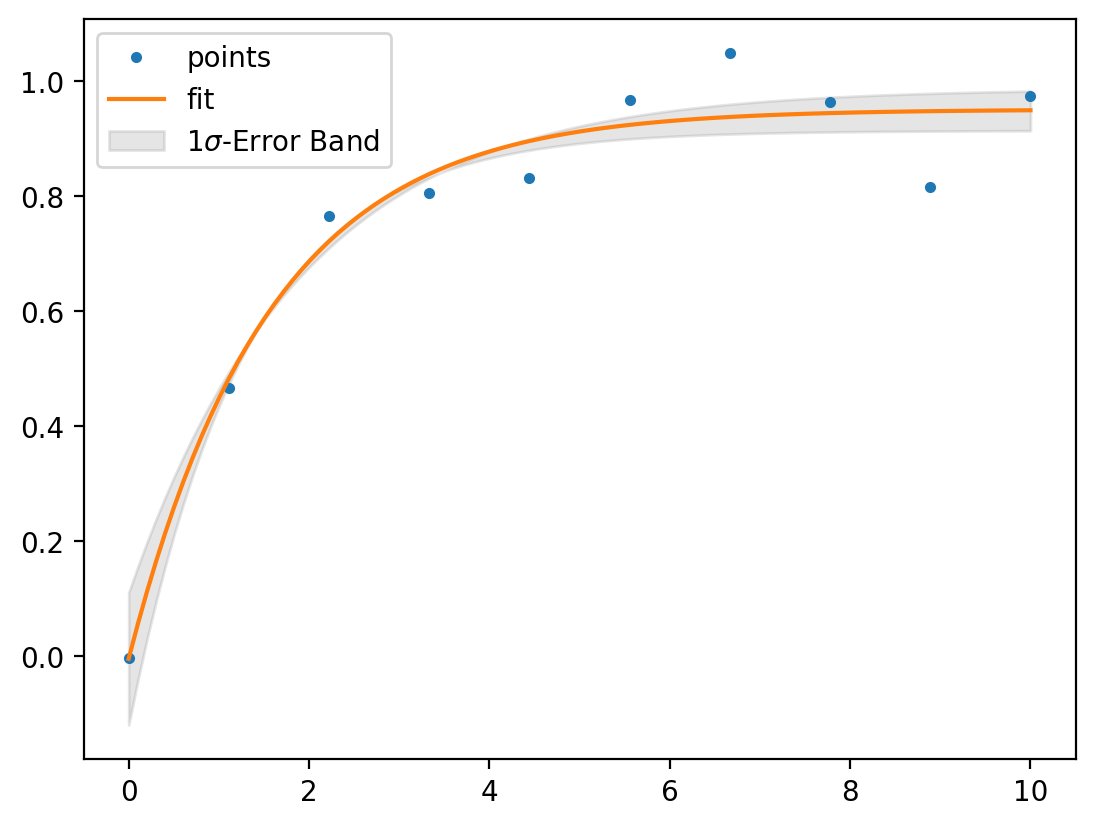

In [59]:
xx = np.linspace(0,10,100)
lower_band = exponential(xx, *(popt_exponential - std))
upper_band = exponential(xx, *(popt_exponential + std))

plt.plot(x,ny,'.',label='points')
plt.plot(xx,exponential(xx, *popt_exponential),label='fit')

plt.fill_between(xx, lower_band, upper_band, color='gray', alpha=0.2, label='1$\sigma$-Error Band')
plt.legend();